# **LAB 08 - OPEN ENDED LAB**

### **import libraries**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib



### **1. Load the dataset**

In [2]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")


### **2. Explore the dataset**

In [3]:
print("First few rows:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nSummary Statistics:")
print(df.describe())

First few rows:
   Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptio

### **3. Check for missing values**

In [4]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole     

### **4. Convert categorical columns into numeric (Label Encoding)**

In [5]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

### **5. Define Features and Target**

In [6]:
X = df.drop(columns=['Attrition'])
y = df['Attrition']

### **6. Train-Test Split**

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### **7. Feature Scaling**

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **8. Train Models**

In [9]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "accuracy": accuracy_score(y_test, y_pred),
        "report": classification_report(y_test, y_pred),
        "conf_matrix": confusion_matrix(y_test, y_pred)
    }
    print(f"\nModel: {name}")
    print("Accuracy:", results[name]["accuracy"])
    print("Classification Report:\n", results[name]["report"])
    print("Confusion Matrix:\n", results[name]["conf_matrix"])


Model: Logistic Regression
Accuracy: 0.891156462585034
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94       255
           1       0.68      0.33      0.45        39

    accuracy                           0.89       294
   macro avg       0.79      0.65      0.69       294
weighted avg       0.88      0.89      0.87       294

Confusion Matrix:
 [[249   6]
 [ 26  13]]

Model: Random Forest
Accuracy: 0.8639455782312925
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       255
           1       0.44      0.10      0.17        39

    accuracy                           0.86       294
   macro avg       0.66      0.54      0.55       294
weighted avg       0.82      0.86      0.83       294

Confusion Matrix:
 [[250   5]
 [ 35   4]]


### **9. Visualizations**

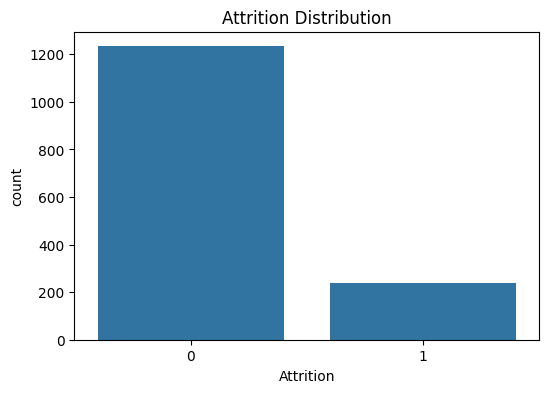

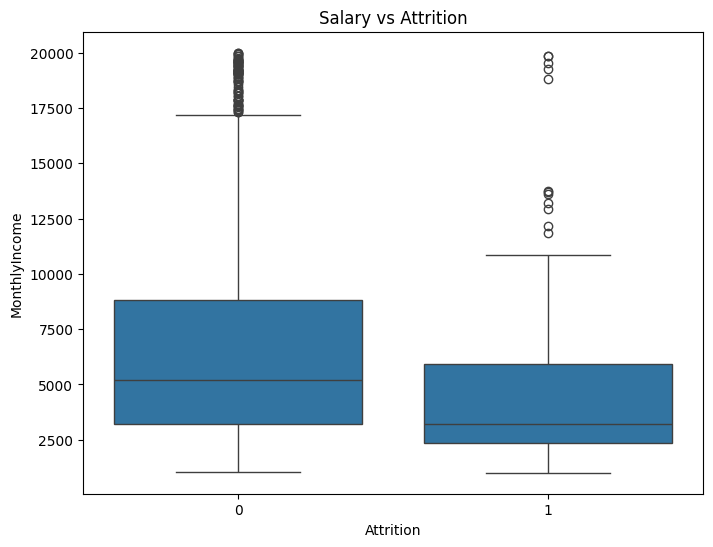

In [10]:
plt.figure(figsize=(6,4))
sns.countplot(x='Attrition', data=df)
plt.title('Attrition Distribution')
plt.show()

plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition', y='MonthlyIncome', data=df)
plt.title('Salary vs Attrition')
plt.show()

### **10. Feature Importance for Random Forest**

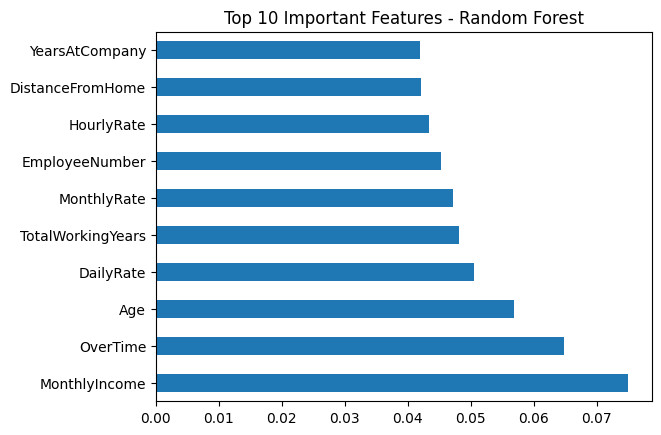

In [11]:
rf_model = models['Random Forest']
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Important Features - Random Forest')
plt.show()

### **11. Model Comparison Plots**

##### **Accuracy Comparison**

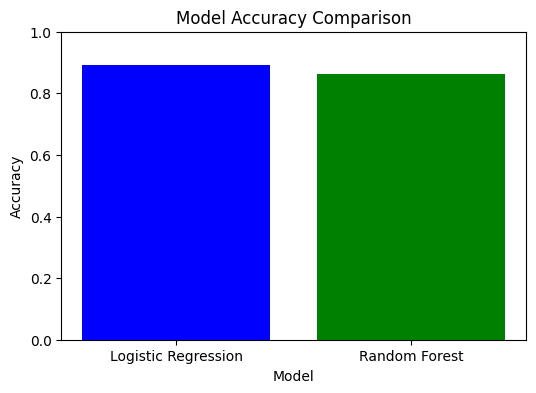

In [12]:
plt.figure(figsize=(6,4))
names = list(results.keys())
accuracies = [results[name]["accuracy"] for name in names]
plt.bar(names, accuracies, color=['blue', 'green'])
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0, 1)
plt.show()

### **Confusion Matrix Comparison**

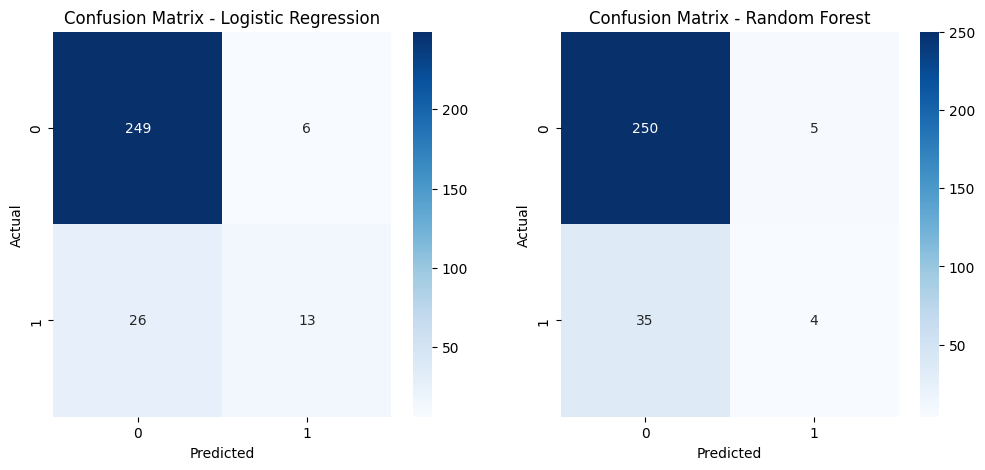

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
for i, name in enumerate(models.keys()):
    sns.heatmap(results[name]["conf_matrix"], annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(f"Confusion Matrix - {name}")
    axes[i].set_xlabel("Predicted")
    axes[i].set_ylabel("Actual")
plt.show()